In [ ]:
##### titanic
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('../1.clustering/titanic.csv')

target = data['Survived']
data = data.drop(['PassengerId', 'Survived'], axis=1)

def sex(a):
    if a == 'male':
        return 0
    else:
        return 1
    
def emb(a):
    if a == 'S':
        return 0
    elif a == 'Q':
        return 1
    else:
        return 2
    
data['Sex'] = data['Sex'].map(sex)
data['Embarked'] = data['Embarked'].map(emb)

train_X, test_X, train_y, test_y = train_test_split(data, target, test_size=0.3, random_state=2019, shuffle=True)

In [ ]:
# breast cancer
from sklearn.datasets import load_breast_cancer
import pandas as pd 
from sklearn.model_selection import train_test_split

d = load_breast_cancer()

data = pd.DataFrame(d.data, columns=d.feature_names)
target = pd.DataFrame(d.target)

train_X, test_X, train_y, test_y = train_test_split(data, target, test_size=0.3, random_state=2019, shuffle=True)

In [2]:
# IEEE Fraud
import numpy as np
import pandas as pd
import pickle

with open('../data/train.bin', 'rb') as f:
    data = pickle.load(f)
# with open('../data/test.bin', 'rb') as f:
#     test = pickle.load(f)

# train = pd.read_csv('../data/train.csv')
# test = pd.read_csv('../data/test.csv')


# drop = ['TransactionID']
# for c in train.columns:
#     if train[c].isnull().sum() / len(train) > 0.5:
#         drop.append(c)
#     elif '_' in c:
#         drop.append(c)
#     if len(train[c].unique()) < 2:
#         drop.append(c)
#         print(c)
        
# train = train.drop(drop, axis=1)
# test = test.drop(drop, axis=1)

# train = train.dropna(how='any')
# test = test.dropna(how='any')

# train = train.reset_index()
# test = test.reset_index()

# with open('../data/train.bin', 'wb') as f:
#     pickle.dump(train, f)
# with open('../data/test.bin', 'wb') as f:
#     pickle.dump(test, f)

In [1]:
## olivetti face data
from sklearn.datasets import fetch_olivetti_faces

data, target = fetch_olivetti_faces(return_X_y=True)

In [ ]:
## fetch_face
from sklearn.datasets import fetch_lfw_people

d = fetch_lfw_people(min_faces_per_person=70)
image_shape = (62, 47)

data = d.data
target = d.target

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(data, target, test_size=0.3, shuffle=True, random_state=0)

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier().fit(train_X, train_y)
print(accuracy_score(test_y, rf.predict(test_X)))

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3).fit(train_X, train_y)
print(accuracy_score(test_y, kn.predict(test_X)))

In [ ]:
import numpy as np
def custom_eval_metric(y_true, y_hat):
    y_hat = np.where(y_hat < 0.5, 0, 1)
    return 'custom', accuracy_score(y_true, y_hat), True

In [ ]:
%%time
from xgboost import XGBClassifier

params= {
    'booster': 'dart',
    'tree_method': 'gpu_hist',
    'n_estimators': 400,
    'learning_rate': 0.1,
    'max_depth': 9,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
#     'reg_alpha': 1,
#     'reg_lambda': 2
    'random_state': 0,
#     'objective': "multi:softmax"
}

xgb_clf = XGBClassifier(**params).fit(train_X, train_y, early_stopping_rounds=100, eval_set=[(test_X, test_y)])
print(accuracy_score(test_y, xgb_clf.predict(test_X)))

In [ ]:
%%time
from lightgbm import LGBMClassifier

params= {
    'boosting': 'gbdt',
#     'tree_method': 'gpu_hist',
    'n_estimators': 400,
    'learning_rate': 0.1,
    'max_depth': 9,
    'min_child_samples': 20, # 결정노드가 되기 위한 최소 자료 수
    'num_leaves': 31, # 트리가 가질 수 있는 최대 리프 수
    'subsample': 0.7, # bagging_fraction
    'colsample_bytree': 0.7, # feature_fraction
    'random_state': 0,
}

lgb_clf = LGBMClassifier(**params).fit(train_X, train_y, early_stopping_rounds=100,eval_set=[(test_X, test_y)])
print(accuracy_score(test_y, lgb_clf.predict(test_X)))

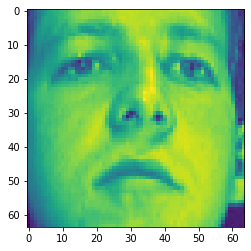

In [10]:
import matplotlib.pyplot as plt
image_shape = (62, 47)

# print(lfw_people.target_names)
plt.imshow(d.data[8].reshape((64, 64)), interpolation='nearest')
plt.show()

In [2]:
## olivetti face data
from sklearn.datasets import fetch_olivetti_faces

d = fetch_olivetti_faces()

In [3]:
d.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [9]:
d.data[0].shape[0] ** 0.5

64.0

In [6]:
d.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22